<a href="https://colab.research.google.com/github/TabithaWKariuki/Machine-Learning-Week-1/blob/main/Machine_Learning_Week_IP_Repetition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Fifa Ranking Analysis






## Defining the Question

### a) Specifying the Question

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### b) Defining the Metric for Success

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### c) Understanding the context 

After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.

This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

### d) Recording the Experimental Design

In order to work on the above problem, you need to do the following:
1. Perform your EDA
2. Perform any necessary feature engineering 
3. Check of multicollinearity
4. Start building the model
5. Cross-validate the model
6. Compute RMSE
7. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
8. Perform appropriate regressions on the data including your justification
9. Challenge your solution by providing insights on how you can make improvements.

### e) Data Relevance

There are two datasets; ranking and results dataset Dataset link. They have appropriate columns to answer the questions. They are both relevant for our analysis.

Both our datasets consists of information on football rankings over time and are therefore suitable to create a model that will be used to predict the results

## Reading the Data

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the fifa ranking Dataset and previewing

fifa=pd.read_csv('fifa_ranking.csv')

fifa.head(3)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [5]:
# Loading the results Dataset and previewing

results=pd.read_csv('results.csv')

results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


## Checking the Data

In [6]:
# Determining the no. of records in our datasets

fifa.shape

(13995, 16)

In [7]:
# Determining the no. of records in our datasets

results.shape

(40839, 9)

In [9]:
# Previewing the bottom of our dataset

fifa.tail(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
13993,106,Uganda,UGA,0.0,355.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2000-08-09
13994,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Previewing the bottom of our dataset

results.tail(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [11]:
# Checking whether each column has an appropriate datatype

fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points            float64
rank_change                float64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [12]:
# Checking whether each column has an appropriate datatype

results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [13]:
# checking the general information of our datasets

fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13995 entries, 0 to 13994
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     13995 non-null  int64  
 1   country_full             13994 non-null  object 
 2   country_abrv             13994 non-null  object 
 3   total_points             13994 non-null  float64
 4   previous_points          13994 non-null  float64
 5   rank_change              13994 non-null  float64
 6   cur_year_avg             13994 non-null  float64
 7   cur_year_avg_weighted    13994 non-null  float64
 8   last_year_avg            13994 non-null  float64
 9   last_year_avg_weighted   13994 non-null  float64
 10  two_year_ago_avg         13994 non-null  float64
 11  two_year_ago_weighted    13994 non-null  float64
 12  three_year_ago_avg       13994 non-null  float64
 13  three_year_ago_weighted  13994 non-null  float64
 14  confederation         

In [14]:
# checking the general information of our dataset
#

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [15]:
# Rename column country_full to country in the dataset 

fifa.rename(columns = {'country_full': 'country'}, inplace=True)
fifa.head(2)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [16]:
#merging the two datasets

data = pd.merge(fifa, results, how = 'left' , left_on =['country'],right_on = ['country'])
data.head(3)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,...,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,1909-04-04,Germany,Switzerland,1.0,0.0,Friendly,Karlsruhe,False
1,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,1910-05-16,Germany,Belgium,0.0,3.0,Friendly,Duisburg,False
2,1,Germany,GER,0.0,57.0,0.0,0.0,0.0,0.0,0.0,...,UEFA,1993-08-08,1910-10-16,Germany,Netherlands,1.0,2.0,Friendly,Kleve,False


In [17]:
# Determining the no. of records in our dataset

data.shape

(2652326, 24)

In [18]:
# Checking whether each column has an appropriate datatype

data.dtypes

rank                         int64
country                     object
country_abrv                object
total_points               float64
previous_points            float64
rank_change                float64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
date                        object
home_team                   object
away_team                   object
home_score                 float64
away_score                 float64
tournament                  object
city                        object
neutral                     object
dtype: object

In [21]:
# checking column names

data.columns

Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'rank_date', 'date', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'city', 'neutral'],
      dtype='object')

## External Data Source Validation

I made sure my data matches something outside of the dataset [link](https://www.fifa.com/fifa-world-ranking/men?dateId=id13603). It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset.

## Tidying the Dataset

In [19]:
# Identifying the Missing Data

data.isnull().sum()

# There are null values in my data

rank                          0
country                       1
country_abrv                  1
total_points                  1
previous_points               1
rank_change                   1
cur_year_avg                  1
cur_year_avg_weighted         1
last_year_avg                 1
last_year_avg_weighted        1
two_year_ago_avg              1
two_year_ago_weighted         1
three_year_ago_avg            1
three_year_ago_weighted       1
confederation                 1
rank_date                     1
date                       1085
home_team                  1085
away_team                  1085
home_score                 1085
away_score                 1085
tournament                 1085
city                       1085
neutral                    1085
dtype: int64

In [38]:
# replacing null values with 0

df=data.fillna(0)

In [39]:
# checking again for null values

df.isnull().sum()

rank                       0
country                    0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
neutral                    0
dtype: int64

In [40]:
# Checking for duplicates

df.duplicated().sum()

0

In [41]:
# Creating new dataset with relevant columns

NEWdata=df[['rank','country','home_team','away_team','home_score','away_score','tournament']]
NEWdata.head(3)

,rank,country,home_team,away_team,home_score,away_score,tournament
0,1,Germany,Germany,Switzerland,1.0,0.0,Friendly
1,1,Germany,Germany,Belgium,0.0,3.0,Friendly
2,1,Germany,Germany,Netherlands,1.0,2.0,Friendly


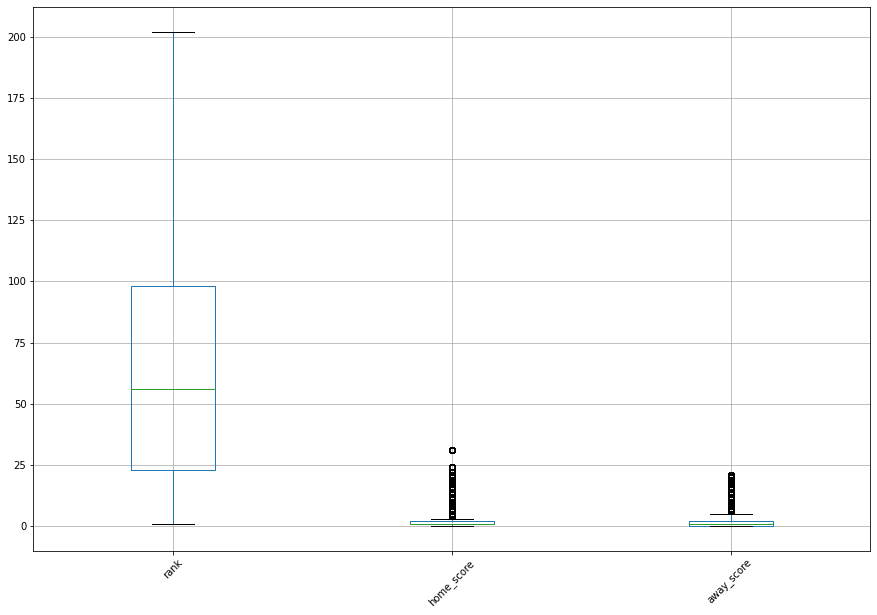

In [42]:
# Checking for Outliers in our dataset

NEWdata.boxplot(figsize=(15,10))
plt.xticks(rotation=45)
plt.show()

# There is presence of outliers in our dataset 
# I will not be dropping them since they are few and they
# might be relevant to our analysis

In [43]:
# we use the to_csv function to create a csv file with the name example 
# and export it

NEWdata.to_csv('FIFAdata.csv')

In [44]:
# Loading and reading the data from our CSV
# Creating a new dataframe df1 and checking its shape

FIFAdata=pd.read_csv('FIFAdata.csv')

FIFAdata.head(2)

,Unnamed: 0,rank,country,home_team,away_team,home_score,away_score,tournament
0,0,1,Germany,Germany,Switzerland,1.0,0.0,Friendly
1,1,1,Germany,Germany,Belgium,0.0,3.0,Friendly


## Exploratory Analysis

Univariate Analysis

In [45]:
# Finding the summary statitics of our dataframe
# This line of code only selects the numerical variables only
# Measures of central tendency


FIFAdata.describe()

,Unnamed: 0,rank,home_score,away_score
count,2.652326e+06,2.652326e+06,2.652326e+06,2.652326e+06
mean,1.326162e+06,6.422070e+01,1.735417e+00,1.173272e+00
std,7.656607e+05,4.724692e+01,1.729056e+00,1.367621e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.630812e+05,2.300000e+01,1.000000e+00,0.000000e+00
50%,1.326162e+06,5.600000e+01,1.000000e+00,1.000000e+00
75%,1.989244e+06,9.800000e+01,2.000000e+00,2.000000e+00
max,2.652325e+06,2.020000e+02,3.100000e+01,2.100000e+01


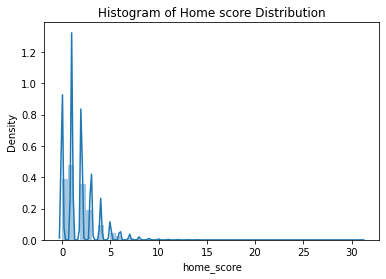

In [46]:
# Distribution graph showing ditribution of home score

sns.distplot(FIFAdata.home_score , kde=True)
plt.title('Histogram of Home score Distribution')
plt.show()

Most scores fall below 5 for the home team

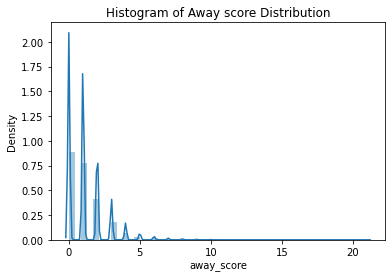

In [47]:
# Distribution graph showing ditribution of away score

sns.distplot(FIFAdata.away_score , kde=True)
plt.title('Histogram of Away score Distribution')
plt.show()

Bivariate

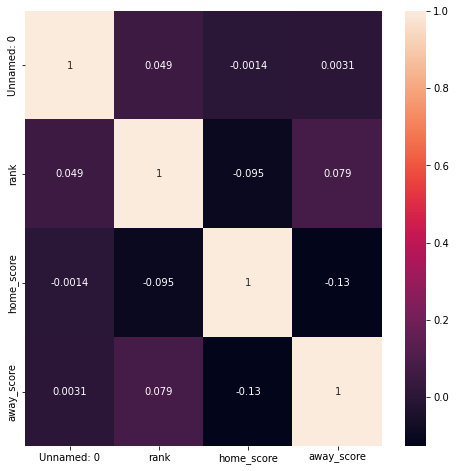

In [48]:
# heat map to show correlation 

plt.figure(figsize=(8, 8))

fr_corr = FIFAdata.corr()
sns.heatmap(fr_corr, 
            xticklabels = fr_corr.columns.values,
            yticklabels = fr_corr.columns.values,
            annot = True);

## Implementing the Solution

In [49]:
# creating a function to represent status
# Feature Engineering: Figure out from 
# the home team’s perspective if the game is a Win, Lose or Draw (Win, Lose, Draw)

def status_hometeam(home_score,away_score):
  if home_score > away_score:
    return 'Win'
  elif home_score < away_score:
    return 'Lose'
  else:
    return 'Draw'

#creating status column

FIFAdata['Status']=FIFAdata.apply(lambda x: status_hometeam(x['home_score'],x['away_score']), axis=1)

In [50]:
# Previewing to check status column

FIFAdata.head(2)

,Unnamed: 0,rank,country,home_team,away_team,home_score,away_score,tournament,Status
0,0,1,Germany,Germany,Switzerland,1.0,0.0,Friendly,Win
1,1,1,Germany,Germany,Belgium,0.0,3.0,Friendly,Lose


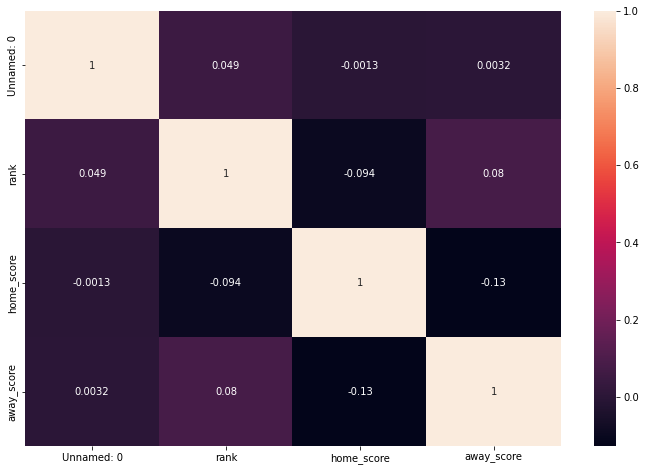

In [33]:
# Multi Collinearity
# Correlation

correlations = FIFAdata.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlations, 
            xticklabels = correlations.columns.values,
            yticklabels = correlations.columns.values,
            annot = True);

Polynomial Regression

In [51]:
# Encode labels in column 'tournament'. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FIFAdata['tournament'] = le.fit_transform(FIFAdata['tournament'])

Model 1: Predict how many goals the home team scores.

In [52]:
#creating and training our polynomial model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = FIFAdata[['rank','tournament']]
y = FIFAdata['home_score']

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

#fit a polynomial regression
poly = PolynomialFeatures(degree = 6)
poly.fit_transform(X_train)

#training our model
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

#making predictions
y_pred = poly_reg.predict(X_test)
y_pred

#using rmse to measure the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2542128792651304
Mean Squared Error: 2.9644613161682947
Root Mean Squared Error: 1.721761108913863


The Rmse score of 1.72 is bigger than mean,hence its not a very good model however it can still be used for prediction it is not too far apart from the MSE.

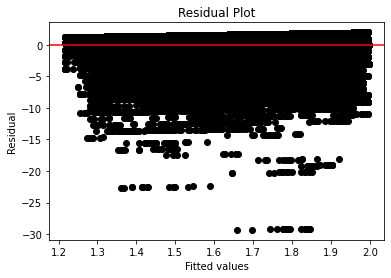

In [53]:
# Bartlett's test

residuals = y_pred - y_test

# Plotting the prediction errors

plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

Model 2: Predict how many goals the away team scores.

In [54]:
#creating and training our polynomial model
#for the second model we use away scores

X = FIFAdata[['rank','tournament']]
y = FIFAdata['away_score']

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

#fit a polynomial regression
poly = PolynomialFeatures(degree = 2)
poly.fit_transform(X_train)

#training our model
poly_reg = LinearRegression()
poly_reg.fit(X_train,y_train)

#making predictions
y_pred = poly_reg.predict(X_test)
y_pred

#using rmse to measure the accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9790758125782681
Mean Squared Error: 1.860003794408492
Root Mean Squared Error: 1.3638195607955226


The Rmse score of 1.36 is bigger than mean,hence its not a very good model however it can still be used for prediction it is not too far apart from the MSE.

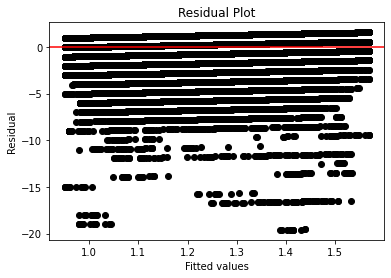

In [55]:
# Bartlett's test

residuals = y_pred - y_test

# Plotting the prediction errors
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), color='red')
plt.show()

In [56]:
#finding the p value

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

#finding the critical value 

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# if test_result > critical_value we reject the null hypothesis

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

inf
The variances are homogeneous!


Cross Validation

Let's now cross validate our model by using k-fold cross validation. We will use 5 folds.

In [57]:
# Encode labels in column 'home_team'. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FIFAdata['home_team'] = le.fit_transform(FIFAdata['home_team'])

In [58]:
# Encode labels in column 'away_team'. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FIFAdata['away_team'] = le.fit_transform(FIFAdata['away_team'])

In [60]:
# Encode labels in column 'status'. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FIFAdata['Status'] = le.fit_transform(FIFAdata['Status'])

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# We will use 5 independent variables for this
X = FIFAdata[[ 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament',]].values
y = FIFAdata['Status'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RMSE of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 0.6819986863532632

Training model 2
Model 2 Root Mean Squared Error: 0.6812788869368459

Training model 3
Model 3 Root Mean Squared Error: 0.6812584842422152

Training model 4
Model 4 Root Mean Squared Error: 0.681291291293722

Training model 5
Model 5 Root Mean Squared Error: 0.6814973355815699


In [62]:
# computing the mean RMSES

np.mean(RMSES)

0.6814649368815233

The average is fairly close to our initial value.

As you can tell from running the code, the RMSE value for our first model is fairly larger than the RMSE we found initially, and that of the other models. This would beg for an analysis of the specific indeces used. Perhaps most of the dataset's outliers were in the test set of model 1? as a challenge, perform a comparative analysis of the subset of the data used to test model 1 in comparison with the dataset as a whole.

Another useful observation is comparing the average RMSE value of all these models to the one we obtain in our initial approache. We created the array RMSES to gather all the RMSE values, we can compute the average simply as follows

Logistic Approach

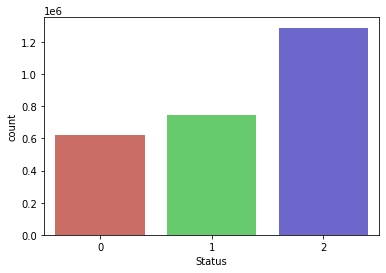

In [64]:
# Checking that our target variable is binary
# To make sure that it's a binary variable, 
# let's use Seaborn's countplot() function.

sb.countplot(x='Status',data=FIFAdata, palette='hls')

In [65]:
FIFAdata.columns

Index(['Unnamed: 0', 'rank', 'country', 'home_team', 'away_team', 'home_score',
       'away_score', 'tournament', 'Status'],
      dtype='object')

In [70]:
# Encode labels in column 'country'. 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
FIFAdata['country'] = le.fit_transform(FIFAdata['country'])

In [68]:
# Split the data into features and the target variable

X = FIFAdata.drop('Status', axis = 1)
y = FIFAdata.Status

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [ ]:
# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

## Challenging the solution

Other algorithms could be implemented to see if there will be an improvement in performance of the models to improve accuracy.

## Follow up questions

### a). Did we have the right data?

The data was relevant for analysis and modelling .

### b). Do we need other data to answer our question?

Yes, for comparision and verification purposes. Additional data could maybe improve output

### c). Did we have the right question?

The questions were all relevant for our analysis